# Introduction

We have been given a dataset containing the data of images of wells, the wells are ordered in columns and rows into the well plate. The wells contain bacteria that react with gold and change their color accordingly, we want to predict the gold concentration of wells. The dataset features are many and relating the well positioning, the camera settings and the "image channel" settings. The labels are `class_target`, that is the "class of concentration", and the `value_target`, that is the concentration of gol itself.

The unit of measure of concentration in `class_target` used is "CFU/ml". CFU stands for Colony Forming Units, which is a measure used in microbiology to estimate the number of viable bacteria or fungal cells in a sample. It's not a direct measurement of the total quantity of bacteria, but rather a measure of the number of cells capable of dividing and forming colonies.In simple words, it is the number of "units of bacteria" capable of forming colonies, therefore "CFU/ml" it's "units of bacteria capable of forming colonies in a milliliter of liquid".

In [1]:
import pandas as pd

df = pd.read_pickle('df.pkl')

We define some utils

In [36]:
from utils import print_full_classification_report, print_full_regression_report

# Dataset basic analysis

In [3]:
print(f"Number of columns: {len(df.columns)}")
print(f"Columns: {', '.join(list(df.columns))}")
print(f"Number of rows: {len(df)}")
print("Data types:")
for col, dtype in df.dtypes.items():
    print(f"\t{col}: {dtype}")

print("First rows")
print(df.head())

Number of columns: 180
Columns: value_target, class_target, well_plate_name, wp_image_version, wp_image_prop, well_name, mock, FNumber, FocalLengthIn35mmFilm, ISOSpeedRatings, Orientation, ExposureTime, FocalLength, Flash, MeteringMode, MaxApertureValue, ExposureBiasValue, BrightnessValue, ApertureValue, ShutterSpeedValue, full_gray_mean, full_gray_stddev, full_gray_mean_trm30, full_gray_skewness, full_gray_entropy, full_gray_entropy2, full_gray_entropy_glcm, full_gray_mean_PIL, full_blue_mean, full_blue_stddev, full_blue_mean_trm30, full_blue_skewness, full_blue_entropy, full_blue_entropy2, full_blue_entropy_glcm, full_blue_mean_PIL, full_green_mean, full_green_stddev, full_green_mean_trm30, full_green_skewness, full_green_entropy, full_green_entropy2, full_green_entropy_glcm, full_green_mean_PIL, full_red_mean, full_red_stddev, full_red_mean_trm30, full_red_skewness, full_red_entropy, full_red_entropy2, full_red_entropy_glcm, full_red_mean_PIL, full_L_mean, full_L_stddev, full_L_mean

# Label Analysis

We analyze `class_target`

Number of classes: 6
Classes: ['0000 CFU:mL', '10^1 CFU:mL', '10^2 CFU:mL', '10^4 CFU:mL', '10^6 CFU:mL', '10^8 CFU:mL']
Number of samples in class "0000 CFU:mL": 11616
Number of samples in class "10^1 CFU:mL": 12672
Number of samples in class "10^2 CFU:mL": 11232
Number of samples in class "10^4 CFU:mL": 8544
Number of samples in class "10^6 CFU:mL": 13056
Number of samples in class "10^8 CFU:mL": 4896


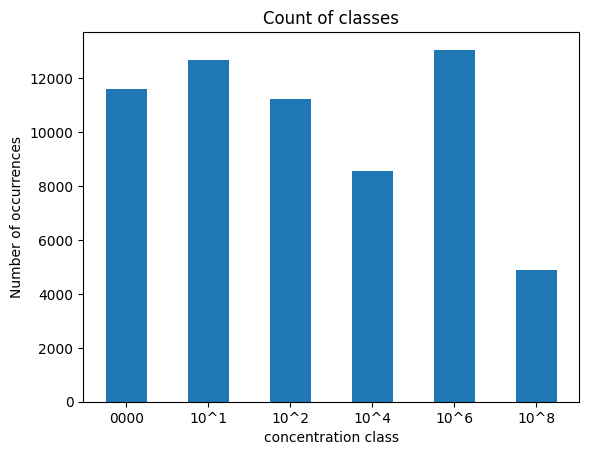

In [73]:
# Find classes
# classes = df['class_target'].unique()
CLASSES = sorted(df['class_target'].unique())
print(f"Number of classes: {len(CLASSES)}")
print(f"Classes: {CLASSES}")

# Find number of samples per class
# classes_counts = df['class_target'].value_counts()
# print(classes_counts)
classes_counts = []
for c in CLASSES:
    class_count = len(df[df['class_target'] == c])
    classes_counts.append(class_count)
    print(f"Number of samples in class \"{c}\": {class_count}")

# # Get distribution of gold concentration
import matplotlib.pyplot as plt

# Count the occurrences of value_target in each interval
# intervals = list(range(1, len(classes) + 1))
intervals = [class_name.strip(" CFU:mL") for class_name in CLASSES]
# Plot the histogram
plt.bar(intervals, classes_counts, width=0.5)

# Set the labels and title
plt.xlabel('concentration class')
plt.ylabel('Number of occurrences')
plt.title('Count of classes')

# Show the plot
plt.show()

We analyze `value_target`

Max concentration: 1.521
Min concentration: 0.184
intervals: [0.184, 0.189348, 0.194696, 0.200044, 0.205392, 0.21073999999999998, 0.216088, 0.221436, 0.22678399999999999, 0.232132, 0.23748, 0.242828, 0.248176, 0.25352399999999997, 0.258872, 0.26422, 0.269568, 0.274916, 0.28026399999999996, 0.285612, 0.29096, 0.296308, 0.301656, 0.307004, 0.31235199999999996, 0.3177, 0.323048, 0.328396, 0.333744, 0.33909199999999995, 0.34443999999999997, 0.349788, 0.355136, 0.36048399999999997, 0.365832, 0.37117999999999995, 0.376528, 0.381876, 0.387224, 0.392572, 0.39791999999999994, 0.40326799999999996, 0.408616, 0.413964, 0.41931199999999996, 0.42466, 0.43000799999999995, 0.43535599999999997, 0.440704, 0.44605199999999995, 0.45139999999999997, 0.456748, 0.46209599999999995, 0.46744399999999997, 0.472792, 0.47813999999999995, 0.483488, 0.488836, 0.49418399999999996, 0.499532, 0.50488, 0.5102279999999999, 0.515576, 0.5209239999999999, 0.526272, 0.53162, 0.5369679999999999, 0.542316, 0.5476639999999999,

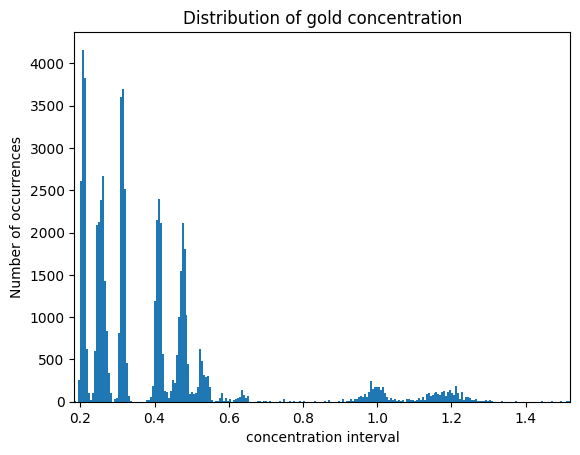

In [5]:
# Get distribution of gold concentration
import matplotlib.pyplot as plt

# Get the maximum and minimum values of value_target
max_value = df['value_target'].max()
min_value = df['value_target'].min()

print(f"Max concentration: {max_value}")
print(f"Min concentration: {min_value}")

# Calculate the step size
number_of_intervals = 250
step_size = (max_value - min_value) / number_of_intervals
intervals = [min_value + i * step_size for i in range(number_of_intervals + 1)]
print(f"intervals: {intervals}")

# Count the occurrences of value_target in each interval
value_counts, _, _ = plt.hist(df['value_target'], bins=intervals)

# Plot the histogram
plt.bar(intervals[:-1], value_counts, width=step_size, align='edge')

# Set the labels and title
plt.xlabel('concentration interval')
plt.ylabel('Number of occurrences')
plt.title('Distribution of gold concentration')

# Adjust x-axis to start from 0
plt.xlim(min(intervals), max(intervals))

# Show the plot
plt.show()


# Missing data analysis

We check the percentages of missing data for each feature and we conclude that we have no missing data

Percentage of missing values per column:
value_target: 0.0%
class_target: 0.0%
well_plate_name: 0.0%
wp_image_version: 0.0%
wp_image_prop: 0.0%
well_name: 0.0%
mock: 0.0%
FNumber: 0.0%
FocalLengthIn35mmFilm: 0.0%
ISOSpeedRatings: 0.0%
Orientation: 0.0%
ExposureTime: 0.0%
FocalLength: 0.0%
Flash: 0.0%
MeteringMode: 0.0%
MaxApertureValue: 0.0%
ExposureBiasValue: 0.0%
BrightnessValue: 0.0%
ApertureValue: 0.0%
ShutterSpeedValue: 0.0%
full_gray_mean: 0.0%
full_gray_stddev: 0.0%
full_gray_mean_trm30: 0.0%
full_gray_skewness: 0.0%
full_gray_entropy: 0.0%
full_gray_entropy2: 0.0%
full_gray_entropy_glcm: 0.0%
full_gray_mean_PIL: 0.0%
full_blue_mean: 0.0%
full_blue_stddev: 0.0%
full_blue_mean_trm30: 0.0%
full_blue_skewness: 0.0%
full_blue_entropy: 0.0%
full_blue_entropy2: 0.0%
full_blue_entropy_glcm: 0.0%
full_blue_mean_PIL: 0.0%
full_green_mean: 0.0%
full_green_stddev: 0.0%
full_green_mean_trm30: 0.0%
full_green_skewness: 0.0%
full_green_entropy: 0.0%
full_green_entropy2: 0.0%
full_green_entrop

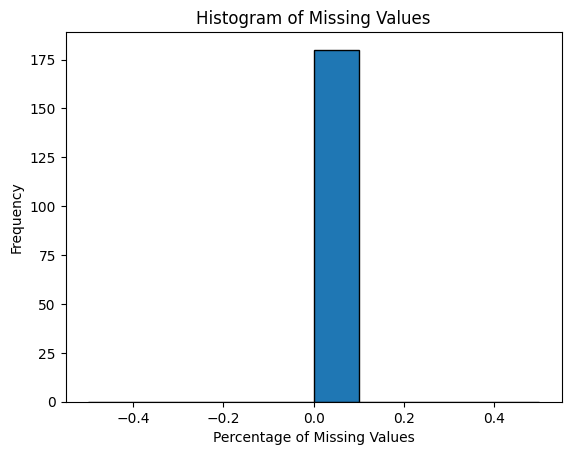

In [6]:
import numpy as np

print("Percentage of missing values per column:")
pct_missings = []
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    pct_missings.append(pct_missing)
    print(f'{col}: {pct_missing}%')

print(f"Mean percentage of missing values: {np.mean(pct_missings)}")

# Print the histogram of missing values using matplotlib
import matplotlib.pyplot as plt

# pct_missings = pct_missings + [0.1] * (100) + [0.05] * (100)  + [0.06] * (100)

fig, ax = plt.subplots()
ax.hist(pct_missings, bins=10, edgecolor='black')
ax.set_title('Histogram of Missing Values')
ax.set_xlabel('Percentage of Missing Values')
ax.set_ylabel('Frequency')
plt.show()

# Outlier Analysis

We check possible outliers in the dataset, using different visualizations

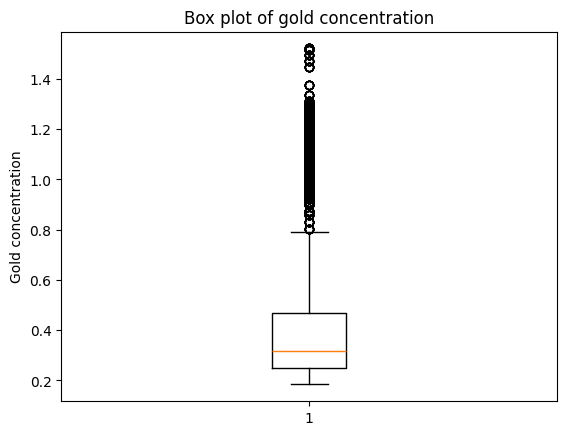

Number of outliers: 40


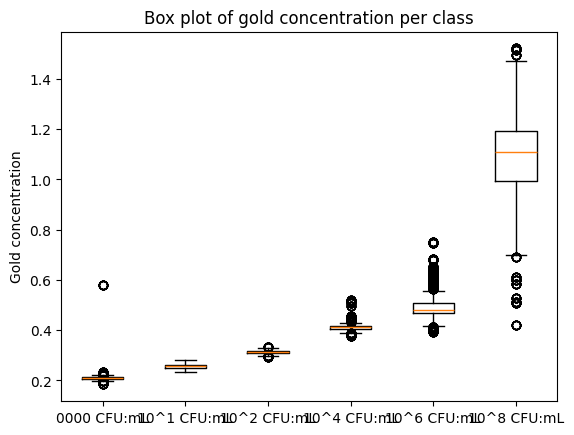

In [7]:
# Box plot of the gold concentration
import matplotlib.pyplot as plt

plt.boxplot(df['value_target'])
plt.title('Box plot of gold concentration')
plt.ylabel('Gold concentration')
plt.show()

# Count number of outliers
# # Count number of occurrences greater than 3 standard deviations from the mean
# mean = df['value_target'].mean()
# std = df['value_target'].std()
# outliers = df[(df['value_target'] > mean + 3 * std) | (df['value_target'] < mean - 3 * std)]
# print(f"Number of outliers: {len(outliers)}")

# Count number of occurrences greater than max_value or less than min_value
max_value = 1.4
min_value = 0.7

# outliers = df[(df['value_target'] > max_value) | (df['value_target'] < min_value)]
outliers = df[(df['value_target'] > max_value)]
print(f"Number of outliers: {len(outliers)}")

# Box plot of the gold concentration per class
import matplotlib.pyplot as plt

# Create a list of gold concentrations per class
class_values = []
for c in classes:
    class_values.append(df[df['class_target'] == c]['value_target'])

# Create a box plot
plt.boxplot(class_values)
plt.title('Box plot of gold concentration per class')
plt.ylabel('Gold concentration')
plt.xticks(range(1, len(classes) + 1), classes)
plt.show()

# Features Analysis

Let's start by analyzing all teh features, in particular their dtypes. We also define manually the numeric and categorical features, fixing mistakes in the dataset.

In [8]:
# Print first record iterating on columns
print("First record:")
for col in df.columns:
    print(f"\t{col}: {df[col][0]}")

LABEL_COLUMNS = ["value_target", "class_target"]
FEATURES_COLUMNS = [col for col in df.columns if col not in LABEL_COLUMNS]
print(f"{FEATURES_COLUMNS = }")
GIVEN_NUMERIC_FEATURES = [col for col in FEATURES_COLUMNS if pd.api.types.is_numeric_dtype(df[col])]
GIVEN_CATEGORICAL_FEATURES = [col for col in FEATURES_COLUMNS if pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col])]
print(f"{GIVEN_NUMERIC_FEATURES = }")
print(f"{GIVEN_CATEGORICAL_FEATURES = }")

CATEGORICAL_FEATURES = [
    'well_plate_name',
    'wp_image_version',
    'well_name',
    'mock'
]

CATEGORICAL_FEATURES = [col for col in CATEGORICAL_FEATURES]
NUMERIC_FEATURES = [col for col in FEATURES_COLUMNS if col not in CATEGORICAL_FEATURES]
print(f"{NUMERIC_FEATURES = }")
print(f"{CATEGORICAL_FEATURES = }")

# Print difference between GIVEN_CATEGORICAL_FEATURES and CATEGORICAL_FEATURES
NUMERIC_FEATURES_GIVEN_AS_CATEGORICAL = list(set(GIVEN_CATEGORICAL_FEATURES) - set(CATEGORICAL_FEATURES))
CATEGORICAL_FEATURES_GIVEN_AS_NUMERIC = list(set(GIVEN_NUMERIC_FEATURES) - set(NUMERIC_FEATURES))
print(f"Features in GIVEN_CATEGORICAL_FEATURES and not in CATEGORICAL_FEATURES: {NUMERIC_FEATURES_GIVEN_AS_CATEGORICAL}")
print(f"Features in CATEGORICAL_FEATURES and not in GIVEN_CATEGORICAL_FEATURES: {CATEGORICAL_FEATURES_GIVEN_AS_NUMERIC}")

# Convert columns to right dtypes
df_converted = df.copy()
for col in NUMERIC_FEATURES_GIVEN_AS_CATEGORICAL:
    df_converted[col] = df_converted[col].astype('float64')

for col in CATEGORICAL_FEATURES_GIVEN_AS_NUMERIC:
    df_converted[col] = df_converted[col].astype('category')

# Print dtypes
print("Data types:")
for col, dtype in df_converted.dtypes.items():
    print(f"\t{col}: {dtype}")

First record:
	value_target: 1.158
	class_target: 10^8 CFU:mL
	well_plate_name: 05
	wp_image_version: 05_0
	wp_image_prop: 0.0
	well_name: A1
	mock: False
	FNumber: 1.7
	FocalLengthIn35mmFilm: 0.0
	ISOSpeedRatings: 226.0
	Orientation: 1.0
	ExposureTime: 0.020003
	FocalLength: 4.71
	Flash: 16.0
	MeteringMode: 2.0
	MaxApertureValue: 0.0
	ExposureBiasValue: 0.0
	BrightnessValue: 8.7
	ApertureValue: 1.53
	ShutterSpeedValue: 5.614
	full_gray_mean: 76.37894375857339
	full_gray_stddev: 42.19194116854811
	full_gray_mean_trm30: 89.51971710244321
	full_gray_skewness: -0.985075922379453
	full_gray_entropy: 4.823225765539228
	full_gray_entropy2: 3.3432053405876
	full_gray_entropy_glcm: 7.1244046874085125
	full_gray_mean_PIL: 76.37894375857339
	full_blue_mean: 66.73251028806584
	full_blue_stddev: 38.11588827465449
	full_blue_mean_trm30: 75.86755250750107
	full_blue_skewness: -0.7398326957511079
	full_blue_entropy: 4.923509474933315
	full_blue_entropy2: 3.4127167110102032
	full_blue_entropy_glcm: 7.

GIVEN_NUMERIC_FEATURES = ['wp_image_prop', 'mock', 'FocalLengthIn35mmFilm', 'ISOSpeedRatings', 'Orientation', 'Flash', 'MeteringMode', 'full_gray_mean', 'full_gray_stddev', 'full_gray_mean_trm30', 'full_gray_skewness', 'full_gray_entropy', 'full_gray_entropy2', 'full_gray_entropy_glcm', 'full_gray_mean_PIL', 'full_blue_mean', 'full_blue_stddev', 'full_blue_mean_trm30', 'full_blue_skewness', 'full_blue_entropy', 'full_blue_entropy2', 'full_blue_entropy_glcm', 'full_blue_mean_PIL', 'full_green_mean', 'full_green_stddev', 'full_green_mean_trm30', 'full_green_skewness', 'full_green_entropy', 'full_green_entropy2', 'full_green_entropy_glcm', 'full_green_mean_PIL', 'full_red_mean', 'full_red_stddev', 'full_red_mean_trm30', 'full_red_skewness', 'full_red_entropy', 'full_red_entropy2', 'full_red_entropy_glcm', 'full_red_mean_PIL', 'full_L_mean', 'full_L_stddev', 'full_L_mean_trm30', 'full_L_skewness', 'full_L_entropy', 'full_L_entropy2', 'full_L_entropy_glcm', 'full_L_mean_PIL', 'full_a_mean',

C:\Users\Fral0\AppData\Local\Temp\ipykernel_22372\2952855254.py:10: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  GIVEN_CATEGORICAL_FEATURES = [col for col in FEATURES_COLUMNS if pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col])]


We want to understand in particular what `wp_image_version` is. We print all occurrences of the well A1 in well plate 05 and all occurrences of well A2 in well plate 05. We discover that the following features are the same, if we fix the `wp_image_version`:
- FNumber
- FocalLengthIn35mmFilm
- ISOSpeedRatings
- Orientation
- ExposureTime
- FocalLength
- Flash
- MeteringMode
- MaxApertureValue
- ExposureBiasValue
- BrightnessValue
- ApertureValue
- ShutterSpeedValue

Therefore we interpret `wp_image_version` as equivalent to those features, there's no bound with time or any other photo setting, we think it represents all available photo settings together. We won't drop this `wp_image_version` feature even thought it should have very high correlation with the listed features all together (not one by one).

In [9]:
# Print all occurrences of the value 'A1' in the column 'well_name' and the value '05' in the column 'well_plate_name'
df_A1_05 = df_converted[(df_converted['well_name'] == 'A1') & (df_converted['well_plate_name'] == '05')]
number_of_A1_occurences = len(df_A1_05)
print(f"Number of occurrences of 'A1' in 'well_name' in well plate '05': {number_of_A1_occurences}")

for i in range(number_of_A1_occurences):
    print(f"Record {i}: - Image version: {df_A1_05['wp_image_version'].iloc[i]}")
    for col in df_A1_05.columns:
        print(f"\t{col}: {df_A1_05[col].iloc[i]}")

# Do the same for A2 in well plate 05
df_A2_05 = df_converted[(df_converted['well_name'] == 'A2') & (df_converted['well_plate_name'] == '05')]
number_of_A2_occurences = len(df_A2_05)
print(f"Number of occurrences of 'A2' in 'well_name' in well plate '05': {number_of_A2_occurences}")

for i in range(number_of_A2_occurences):
    print(f"Record {i}: - Image version: {df_A2_05['wp_image_version'].iloc[i]}")
    for col in df_A2_05.columns:
        print(f"\t{col}: {df_A2_05[col].iloc[i]}")

Number of occurrences of 'A1' in 'well_name' in well plate '05': 7
Record 0: - Image version: 05_0
	value_target: 1.158
	class_target: 10^8 CFU:mL
	well_plate_name: 05
	wp_image_version: 05_0
	wp_image_prop: 0.0
	well_name: A1
	mock: False
	FNumber: 1.7
	FocalLengthIn35mmFilm: 0.0
	ISOSpeedRatings: 226.0
	Orientation: 1.0
	ExposureTime: 0.020003
	FocalLength: 4.71
	Flash: 16.0
	MeteringMode: 2.0
	MaxApertureValue: 0.0
	ExposureBiasValue: 0.0
	BrightnessValue: 8.7
	ApertureValue: 1.53
	ShutterSpeedValue: 5.614
	full_gray_mean: 76.37894375857339
	full_gray_stddev: 42.19194116854811
	full_gray_mean_trm30: 89.51971710244321
	full_gray_skewness: -0.985075922379453
	full_gray_entropy: 4.823225765539228
	full_gray_entropy2: 3.3432053405876
	full_gray_entropy_glcm: 7.1244046874085125
	full_gray_mean_PIL: 76.37894375857339
	full_blue_mean: 66.73251028806584
	full_blue_stddev: 38.11588827465449
	full_blue_mean_trm30: 75.86755250750107
	full_blue_skewness: -0.7398326957511079
	full_blue_entropy: 

Now we analyze some features that had an unexpected dtype or unexpected values

In [10]:
# Print the unique values of the column "mock" and "Orientation"
check_unique_columns = ["mock", "Orientation", "wp_image_prop", "ExposureTime", "FocalLength", "MaxApertureValue", "ExposureBiasValue",	"BrightnessValue","ApertureValue", "ShutterSpeedValue"]
for col in check_unique_columns:
    print(f"Unique values of the column '{col}': {df_converted[col].unique()}")


Unique values of the column 'mock': [False]
Categories (1, bool): [False]
Unique values of the column 'Orientation': [1.]
Unique values of the column 'wp_image_prop': [0.]
Unique values of the column 'ExposureTime': [0.020003 0.010001 0.010002 0.005001 0.009971 0.00924  0.0091   0.00904
 0.008689 0.00988  0.00472  0.009412 0.009504 0.00956  0.009106 0.00944
 0.00962  0.009314 0.004985]
Unique values of the column 'FocalLength': [4.71]
Unique values of the column 'MaxApertureValue': [0.]
Unique values of the column 'ExposureBiasValue': [0.]
Unique values of the column 'BrightnessValue': [ 8.7  8.3  8.5  8.2  7.6  7.8  8.4  7.5  8.   7.9  8.1  8.6  7.7  8.8
  8.9  9.   9.2  9.1  9.4  9.3  7.3  7.4  9.8  9.5  9.6  9.9  9.7 10.6
 10.8 10.3 10.9 10.2 11.2 11.1 11.3 11.4 11.  10.7 10.5]
Unique values of the column 'ApertureValue': [1.53]
Unique values of the column 'ShutterSpeedValue': [5.614 6.629 7.636 6.643 6.754 6.768 6.781 6.845 6.658 7.721 6.727 6.714
 6.7   6.686 6.741 7.643]


We drop all columns that have a unique value, because they have no variance and they have no information value

In [11]:
# Drop all columns with only one unique value
df_dropped = df_converted.copy()
dropped_columns = {}
for col in df_converted.columns:
    unique_values = df_converted[col].unique()
    if len(unique_values) == 1:
        print(f"Dropping column '{col}' with unique value: {unique_values[0]}")
        dropped_columns[col] = unique_values[0]
        df_dropped = df_dropped.drop(columns=[col])
print(f"Dropped {len(dropped_columns)} columns with unique values:")
for col, value in dropped_columns.items():
    print(f"\t'{col}' with unique value: {value}")

NUMERIC_FEATURES = [col for col in NUMERIC_FEATURES if col in df_dropped.columns]
CATEGORICAL_FEATURES = [col for col in CATEGORICAL_FEATURES if col in df_dropped.columns]
print(f"{NUMERIC_FEATURES = }")
print(f"{CATEGORICAL_FEATURES = }")

Dropping column 'wp_image_prop' with unique value: 0.0
Dropping column 'mock' with unique value: False
Dropping column 'FNumber' with unique value: 1.7
Dropping column 'FocalLengthIn35mmFilm' with unique value: 0.0
Dropping column 'Orientation' with unique value: 1.0
Dropping column 'FocalLength' with unique value: 4.71
Dropping column 'Flash' with unique value: 16.0
Dropping column 'MeteringMode' with unique value: 2.0
Dropping column 'MaxApertureValue' with unique value: 0.0
Dropping column 'ExposureBiasValue' with unique value: 0.0
Dropping column 'ApertureValue' with unique value: 1.53
Dropped 11 columns with unique values:
	'wp_image_prop' with unique value: 0.0
	'mock' with unique value: False
	'FNumber' with unique value: 1.7
	'FocalLengthIn35mmFilm' with unique value: 0.0
	'Orientation' with unique value: 1.0
	'FocalLength' with unique value: 4.71
	'Flash' with unique value: 16.0
	'MeteringMode' with unique value: 2.0
	'MaxApertureValue' with unique value: 0.0
	'ExposureBiasVal

## Feature selection

We convert categorical features with one-hot encoding

In [96]:
# Convert categorical features to one-hot encoding
df_onehot = pd.get_dummies(df_dropped, columns=CATEGORICAL_FEATURES)
# TEMP!
# df_onehot = df_onehot.iloc[:, :200]
FEATURES_COLUMNS = [col for col in df_onehot.columns if col not in LABEL_COLUMNS]
print(f"Feature columns number after one-hot encoding: {len(FEATURES_COLUMNS)}")

Feature columns number after one-hot encoding: 962


### Correlation calculations

We calculate Pearson correlation between features and we drop the features

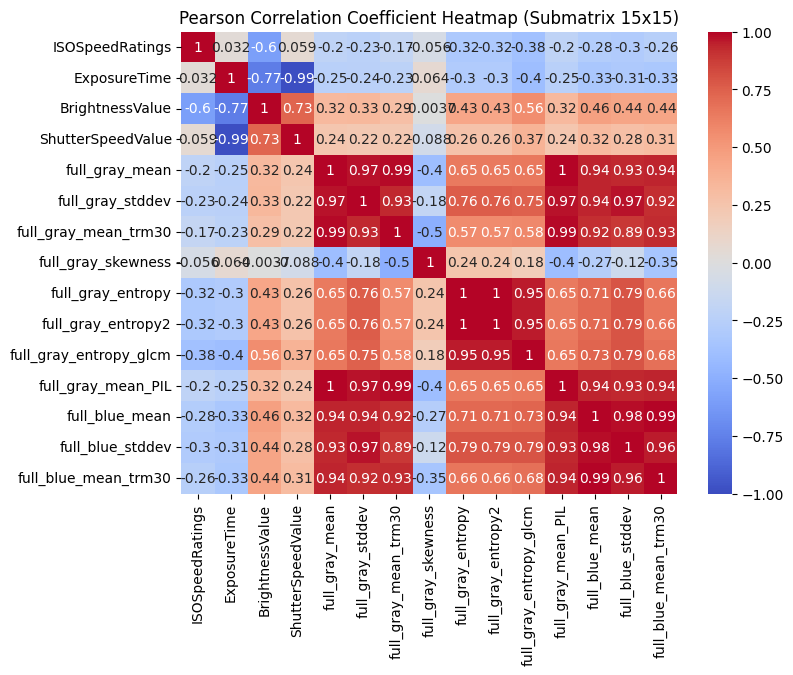

Dropped 148 columns with correlation coefficient above 0.8: {'blue_entropy2', 'S_mean_PIL', 'b_entropy', 'V_stddev', 'full_L_entropy_glcm', 'blue_mean', 'L_entropy2', 'full_S_mean_trm30', 'a_stddev', 'full_H_stddev', 'full_red_stddev', 'V_mean_PIL', 'gray_mean', 'full_a_entropy_glcm', 'full_V_mean_trm30', 'L_stddev', 'L_mean_PIL', 'b_stddev', 'red_entropy_glcm', 'S_entropy', 'full_blue_skewness', 'full_green_mean', 'b_mean', 'V_entropy', 'full_b_mean', 'blue_mean_PIL', 'H_entropy2', 'full_gray_mean_trm30', 'S_stddev', 'L_skewness', 'full_green_mean_trm30', 'gray_entropy_glcm', 'full_H_mean_trm30', 'blue_mean_trm30', 'full_blue_mean_trm30', 'full_S_entropy_glcm', 'green_mean_PIL', 'L_mean', 'full_red_entropy_glcm', 'green_entropy', 'full_green_entropy2', 'green_stddev', 'full_a_stddev', 'full_a_entropy', 'a_entropy', 'H_mean_PIL', 'L_mean_trm30', 'b_entropy_glcm', 'L_entropy', 'full_V_mean_PIL', 'a_mean', 'red_stddev', 'S_mean_trm30', 'green_mean_trm30', 'gray_skewness', 'H_skewness', '

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pearson correlation coefficient
SUBMATRIX_SIZE = 15
FEATURES_COLUMNS = [col for col in df_onehot.columns if col not in LABEL_COLUMNS]
correlation_matrix = df_onehot[FEATURES_COLUMNS].corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix.iloc[:SUBMATRIX_SIZE, :SUBMATRIX_SIZE], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Pearson Correlation Coefficient Heatmap (Submatrix {SUBMATRIX_SIZE}x{SUBMATRIX_SIZE})')
plt.show()

# Set the correlation threshold
threshold = 0.8

# Create a mask to identify columns to drop
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)

# Drop the identified columns
df_onehot_dropped = df_onehot.drop(columns=to_drop)
print(f"Dropped {len(to_drop)} columns with correlation coefficient above {threshold}: {to_drop}")
print(f"Remaining columns: {df_onehot_dropped.columns}")

len(FEATURES_COLUMNS) = 814


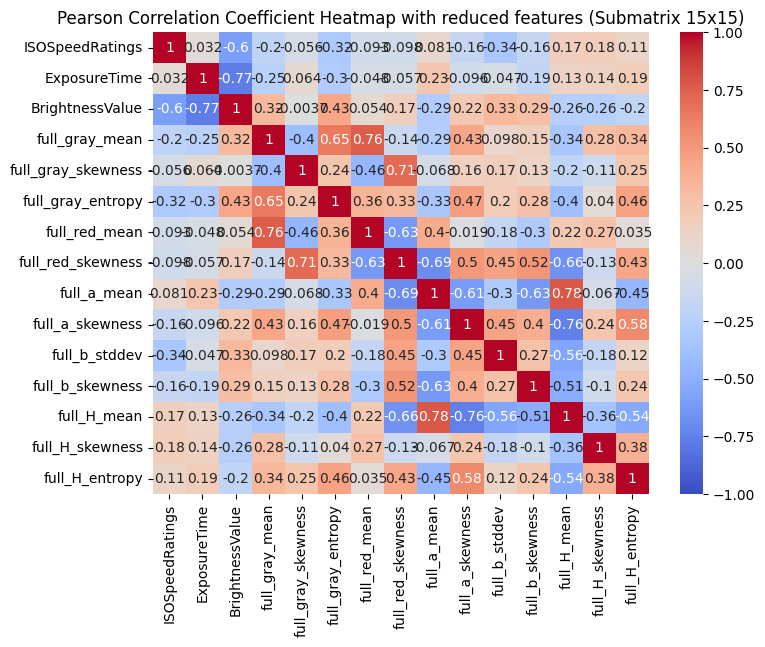

In [98]:
# Plot the heatmap of the remaining features
FEATURES_COLUMNS = [col for col in df_onehot_dropped.columns if col not in LABEL_COLUMNS]
print(f"{len(FEATURES_COLUMNS) = }")
SUBMATRIX_SIZE = 15
correlation_matrix_dropped = correlation_matrix[FEATURES_COLUMNS].loc[FEATURES_COLUMNS]

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_dropped.iloc[:SUBMATRIX_SIZE, :SUBMATRIX_SIZE], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Pearson Correlation Coefficient Heatmap with reduced features (Submatrix {SUBMATRIX_SIZE}x{SUBMATRIX_SIZE})')
plt.show()

We calculate chi-squared correlation with the each feature with the label `class_target`, we drop the columns with a correlation below a threshold

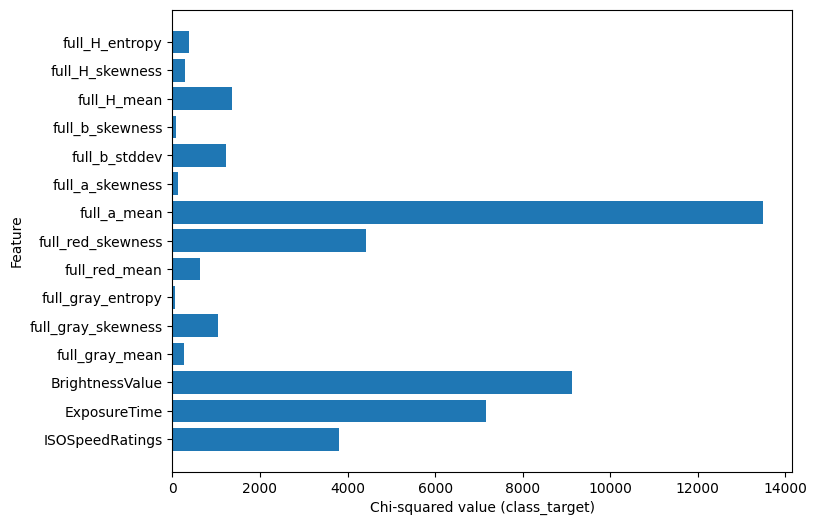

Best feature according to chi-squared value: ('full_a_mean', 13486.414567685228)
Worst feature according to chi-squared value: ('well_name_H9', 1.5225840531423265e-23)
Kept 500 features, dropped 314 features


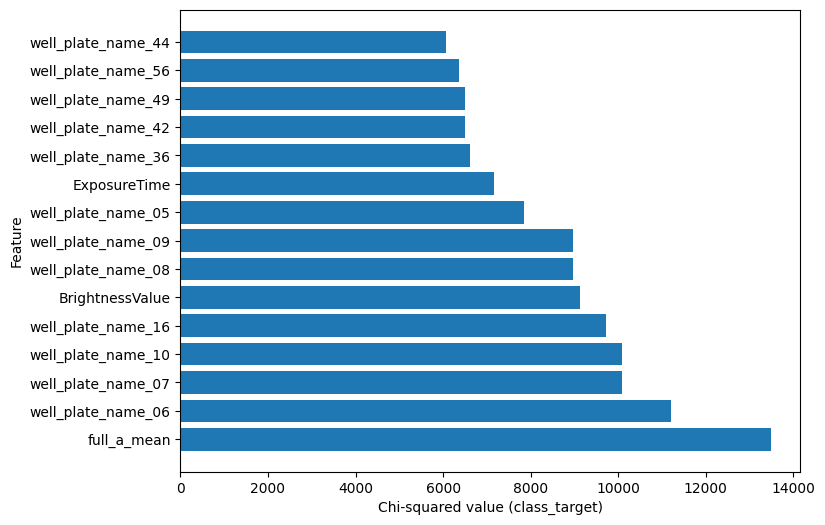

In [99]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# Convert categorical target to numeric values
le = LabelEncoder()
y_class_target = le.fit_transform(df_onehot_dropped["class_target"])

# Select categorical features for chi-squared test
FEATURES_COLUMNS = [col for col in df_onehot_dropped.columns if col not in LABEL_COLUMNS]

# Apply non-negative transformation to the input data
scaler = MinMaxScaler()
X_features = scaler.fit_transform(df_onehot_dropped[FEATURES_COLUMNS])

# Chi-squared test
chi2_values, p_values = chi2(X_features, y_class_target)

# Create a plot for the chi-squared values
NUMBER_OF_FEATURES_TO_PLOT = 15

plt.figure(figsize=(8, 6))
plt.barh(FEATURES_COLUMNS[:NUMBER_OF_FEATURES_TO_PLOT], chi2_values[:NUMBER_OF_FEATURES_TO_PLOT])
plt.xlabel('Chi-squared value (class_target)')
plt.ylabel('Feature')
le = LabelEncoder()
y = le.fit_transform(df_onehot_dropped["class_target"])
plt.show()

# # Drop columns with chi-squared value below a threshold
# threshold = 0.1
# to_drop = [col for col, chi2_val in zip(FEATURES_COLUMNS, chi2_values) if chi2_val < threshold]
# df_onehot_dropped_chi2 = df_onehot_dropped.drop(columns=to_drop)
# print(f"Dropped {len(to_drop)} columns with chi-squared value below {threshold}: {to_drop}")

# Sort features by chi-squared value using sorted
feature_columns_with_chi_squared_value = sorted(zip(FEATURES_COLUMNS, chi2_values), key=lambda x: x[1], reverse=True)
FEATURES_COLUMNS = [col for col, chi2_val in feature_columns_with_chi_squared_value]
print(f"Best feature according to chi-squared value: {feature_columns_with_chi_squared_value[0]}")
print(f"Worst feature according to chi-squared value: {feature_columns_with_chi_squared_value[-1]}")

# Keep only the top features
NUMBER_OF_FEATURES_TO_KEEP = 500
number_of_dropped_features = len(FEATURES_COLUMNS) - NUMBER_OF_FEATURES_TO_KEEP
FEATURES_COLUMNS = FEATURES_COLUMNS[:NUMBER_OF_FEATURES_TO_KEEP]
df_onehot_dropped_chi2 = df_onehot_dropped[FEATURES_COLUMNS + LABEL_COLUMNS]
print(f"Kept {NUMBER_OF_FEATURES_TO_KEEP} features, dropped {number_of_dropped_features} features")

# Create a new plot for the Chi-squared values
FEATURES_COLUMNS = [col for col in df_onehot_dropped_chi2.columns if col not in LABEL_COLUMNS]
X_features = scaler.fit_transform(df_onehot_dropped_chi2[FEATURES_COLUMNS])
y_class_target = le.fit_transform(df_onehot_dropped_chi2["class_target"])
chi2_values, _ = chi2(X_features, y_class_target)
plt.figure(figsize=(8, 6))
plt.barh(FEATURES_COLUMNS[:NUMBER_OF_FEATURES_TO_PLOT], chi2_values[:NUMBER_OF_FEATURES_TO_PLOT])
plt.xlabel('Chi-squared value (class_target)')
plt.ylabel('Feature')
plt.show()

# TODO - CHECK: understand why since value_target is continuous, it is not possible to apply chi-squared
# # Do the same for value_target (numeric feature)
# # Apply non-negative transformation to the input data
# scaler = MinMaxScaler()
# X = scaler.fit_transform(df_onehot_dropped_chi2[FEATURES_COLUMNS])
# y = df["value_target"]

# # Chi-squared test
# chi2_values, p_values = chi2(X, y)

# # Create a plot for the chi-squared values
# plt.figure(figsize=(8, 6))
# plt.barh(FEATURES_COLUMNS, chi2_values)
# plt.xlabel('Chi-squared value (value_target)')
# plt.ylabel('Feature')
# plt.show()

# # Drop columns with chi-squared value below a threshold
# threshold = 0.1
# to_drop = [col for col, chi2_val in zip(FEATURES_COLUMNS, chi2_values) if chi2_val < threshold]
# df_onehot_dropped_chi2 = df_onehot_dropped_chi2.drop(columns=to_drop)

# # Create a new plot for the Chi-squared values
# FEATURES_COLUMNS = [col for col in df_onehot_dropped_chi2.columns if col not in LABEL_COLUMNS]
# chi2_values, _ = chi2(X, y)
# plt.figure(figsize=(8, 6))
# plt.barh(FEATURES_COLUMNS, chi2_values)
# plt.xlabel('Chi-squared value (value_target)')
# plt.ylabel('Feature')
# plt.show()



We do feature importance, just to compare

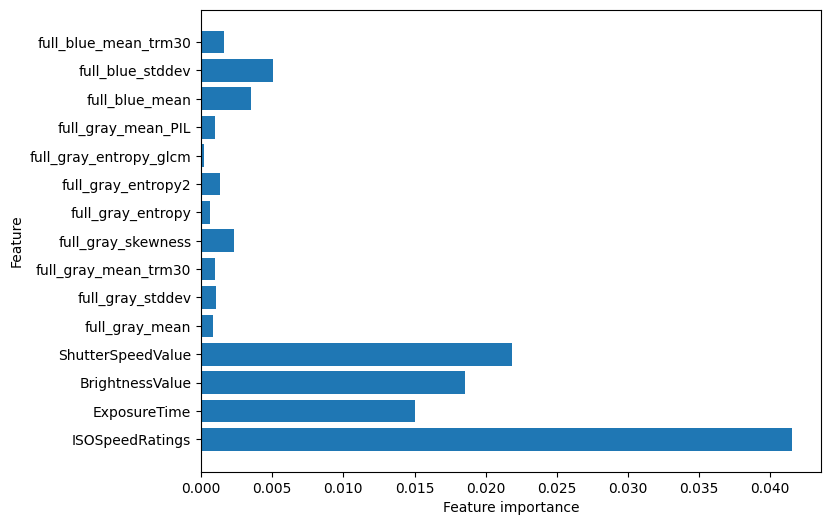

1. full_a_stddev: 0.05826118805394394
2. ISOSpeedRatings: 0.04148942114942014
3. S_stddev: 0.028262428366584404
4. b_stddev: 0.024657978313581803
5. a_stddev: 0.02398345481936436
6. a_mean_PIL: 0.022952901890782664
7. full_S_entropy: 0.022890432702206386
8. ShutterSpeedValue: 0.021883739018415418
9. full_S_entropy_glcm: 0.020316284314715043
10. full_a_mean_PIL: 0.01949421916493465
11. full_H_mean: 0.019400920293162545
12. full_b_mean: 0.01905012788916071
13. a_entropy: 0.01902811630328525
14. BrightnessValue: 0.01853542379897261
15. H_stddev: 0.01680594047435312
16. full_a_mean: 0.016537301178952336
17. full_S_entropy2: 0.01629108979698144
18. a_entropy2: 0.01536714001055921
19. ExposureTime: 0.015010200111372498
20. b_mean_trm30: 0.014266785966915165
21. full_S_stddev: 0.013897897600980704
22. full_b_mean_PIL: 0.013251049745962085
23. full_b_stddev: 0.01295475453832922
24. S_mean_trm30: 0.012433506410087166
25. a_mean_trm30: 0.012430151802137477
26. H_mean_trm30: 0.012323012220289404


In [16]:
# Do feature selection using Random Forest
from sklearn.ensemble import RandomForestClassifier

FEATURES_COLUMNS = [col for col in df_onehot.columns if col not in LABEL_COLUMNS]
X = df_onehot[FEATURES_COLUMNS]
y = le.fit_transform(df_onehot["class_target"])

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a plot for the feature importances
NUMBER_OF_FEATURES_TO_PLOT = 15
plt.figure(figsize=(8, 6))
plt.barh(FEATURES_COLUMNS[:NUMBER_OF_FEATURES_TO_PLOT], feature_importances[:NUMBER_OF_FEATURES_TO_PLOT])
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

# Sort features by importance using sorted and print them
feature_columns_with_importance = sorted(zip(FEATURES_COLUMNS, feature_importances), key=lambda x: x[1], reverse=True)
for i, (feature, importance) in enumerate(feature_columns_with_importance):
    print(f"{i + 1}. {feature}: {importance}")

# Missing Data Analysis

# Dimentionality reduction

We perform a PCA. We tried many different number of components and we tried with different number of features selected with previous methods.

Doing PCA with 200 components
Explained variance ratio: [0.10443914 0.06270869 0.02859874 0.01948867 0.01861078 0.01258539
 0.01212338 0.01199419 0.01188492 0.01158472 0.01127113 0.01106526
 0.01090896 0.01086499 0.01065743 0.01049997 0.01048264 0.01030682
 0.01017859 0.01011363 0.01004414 0.00996989 0.00979248 0.00975223
 0.00974745 0.00969187 0.00960803 0.00936484 0.00916226 0.00907832
 0.0089801  0.00880711 0.00859664 0.00843225 0.00829    0.00825822
 0.00825105 0.0082498  0.00824809 0.0080131  0.00796055 0.00768343
 0.00752561 0.00750628 0.00750041 0.0073124  0.0071257  0.00703839
 0.00682097 0.00679775 0.00675789 0.00670158 0.00623829 0.00614957
 0.0061243  0.00603275 0.00547332 0.0031793  0.0020413  0.00149204
 0.0013619  0.00101923 0.00078802 0.00075952 0.00075578 0.00074977
 0.00074977 0.00074977 0.00074977 0.00074977 0.00074977 0.00074977
 0.00074977 0.00074977 0.00074977 0.00074977 0.00074977 0.00074977
 0.00074977 0.00074977 0.00074977 0.00074977 0.00074977 0.00074977
 0.000

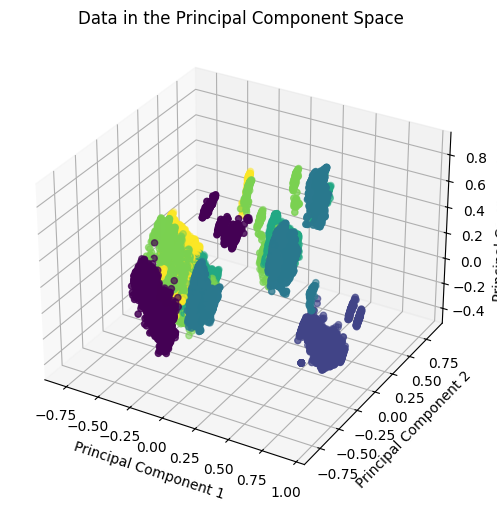

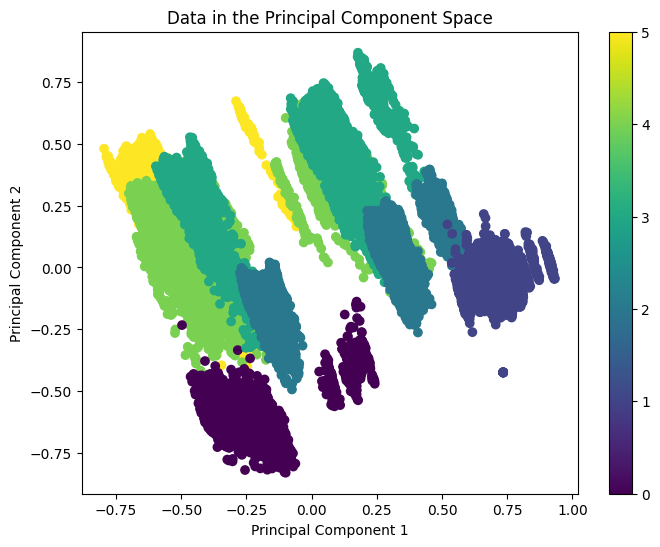

In [100]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Set the number of components
scaler = MinMaxScaler()
FEATURES_COLUMNS = [col for col in df_onehot_dropped_chi2.columns if col not in LABEL_COLUMNS]
X_features = scaler.fit_transform(df_onehot_dropped_chi2[FEATURES_COLUMNS])
n_components = min(200, len(FEATURES_COLUMNS))

# Create an instance of PCA with the desired number of components
print(f"Doing PCA with {n_components} components")
pca = PCA(n_components=n_components)

# Fit the PCA model to your data
pca.fit(X_features)

# Transform the data to the principal components
X_pca = pca.transform(X_features)

# Print the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance_ratio}")
print(f"Total explained variance ratio: {sum(explained_variance_ratio)}")

# # Plot the data in the principal component space
# plt.scatter(X_pca[:, 0], X_pca[:, 1])
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA')
# plt.show()

# Plot the data in the principal component space
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Data in the Principal Component Space')
plt.show()


# Plot the data in the principal component space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data in the Principal Component Space')
plt.colorbar()



We perform a t-SNE on the PCA result. We apply PCA first because t-SNE is more computationally expensive.

Doing t-SNE with 2 components


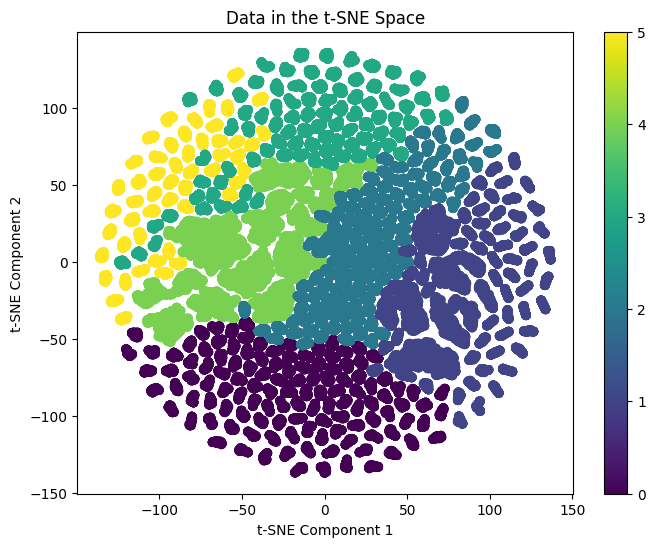

In [18]:
# Apply t-SNE
from sklearn.manifold import TSNE

# Set the number of components
n_components = 2

# Create an instance of TSNE with the desired number of components
print(f"Doing t-SNE with {n_components} components")
tsne = TSNE(n_components=n_components)

# Fit the t-SNE model to your data
X_tsne = tsne.fit_transform(X_pca)

# Plot the data in the t-SNE space
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Data in the t-SNE Space')
plt.colorbar()
plt.show()

Doing UMAP with 2 components


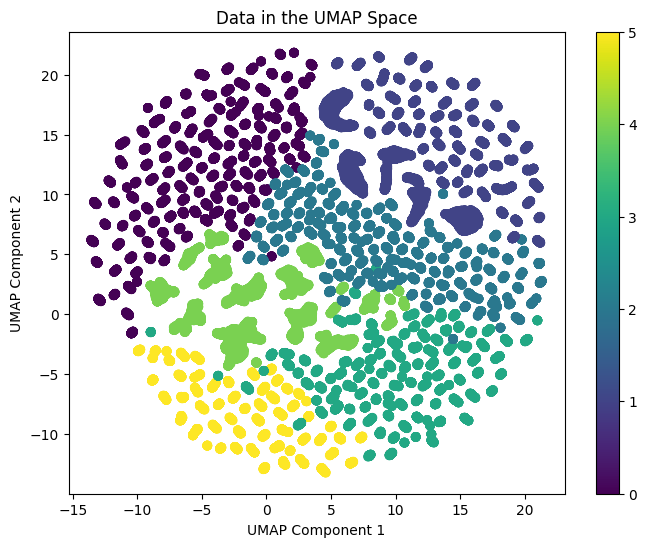

In [101]:
# Apply UMAP
import umap

# Set the number of components
n_components = 2

# Create an instance of UMAP with the desired number of components
print(f"Doing UMAP with {n_components} components")

# Fit the UMAP model to your data
umap_model = umap.UMAP(n_components=n_components)
X_umap = umap_model.fit_transform(X_pca)

# Plot the data in the UMAP space
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('Data in the UMAP Space')
plt.colorbar()
plt.show()

# Training - Classification

Let's define the train and test set.

In [102]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Set the dataset
le = LabelEncoder()
X = X_umap
y = le.fit_transform(df_onehot_dropped_chi2["class_target"])

# Set the test size
test_size = 0.2

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42) # random_state set for reproducibility

# Print the shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Print unique values of y_train and y_test
print()
print(f"Unique values of y_train: {np.unique(y_train)}")

# Print example of train and test data
print()
print("Example of train data:")
print(f"X_train[0]: {X_train[0]}")
print(f"y_train[0]: {y_train[0]}")

print()
print("Example of test data:")
print(f"X_test[0]: {X_test[0]}")
print(f"y_test[0]: {y_test[0]}")


X_train shape: (49612, 2)
X_test shape: (12404, 2)
y_train shape: (49612,)
y_test shape: (12404,)

Unique values of y_train: [0 1 2 3 4 5]

Example of train data:
X_train[0]: [-13.025879    1.2946692]
y_train[0]: 0

Example of test data:
X_test[0]: [13.097329 15.24402 ]
y_test[0]: 1


We apply Naive Bayes, that has the model performance that we want to beat.

Accuracy: 0.852950661077072
Confusion matrix:


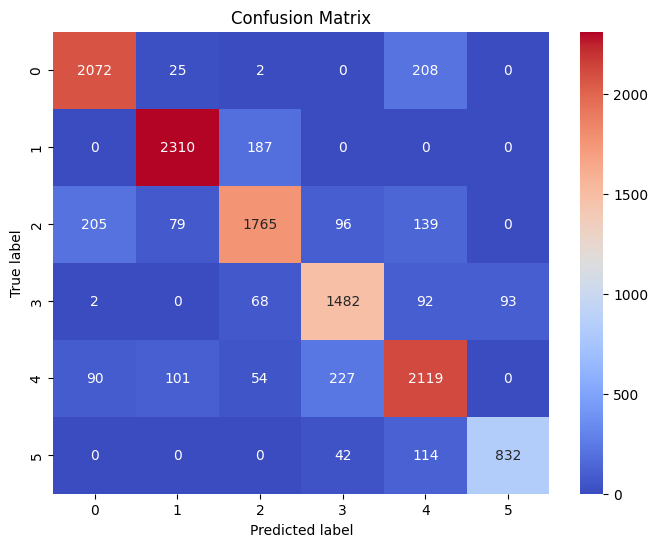

Classification Report:
              precision    recall  f1-score   support

 0000 CFU:mL       0.87      0.90      0.89      2307
 10^1 CFU:mL       0.92      0.93      0.92      2497
 10^2 CFU:mL       0.85      0.77      0.81      2284
 10^4 CFU:mL       0.80      0.85      0.83      1737
 10^6 CFU:mL       0.79      0.82      0.81      2591
 10^8 CFU:mL       0.90      0.84      0.87       988

    accuracy                           0.85     12404
   macro avg       0.86      0.85      0.85     12404
weighted avg       0.85      0.85      0.85     12404



In [ ]:
# Apply Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Create an instance of the model
nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Predict the classes of the test data
y_pred = nb.predict(X_test)

# Print the full classification report
print_full_classification_report(y_test, y_pred, target_names=le.classes_)

We apply K-means

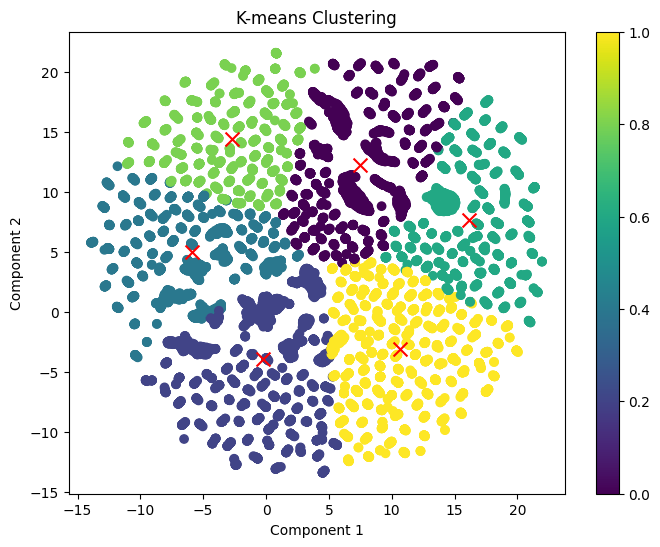

Accuracy: 0.0208803611738149
Silhouette score: 0.31458353996276855
Inertia: 1392969.25


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score

np.random.seed(5)

# Set the number of clusters
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters)

# Fit the K-means model to the data
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

# Get the cluster centers
centroids = kmeans.cluster_centers_

# Plot the data and the cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('K-means Clustering')
plt.colorbar()
plt.show()

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the silhouette score
silhouette = silhouette_score(X_test, y_pred)
print(f"Silhouette score: {silhouette}")

# Calculate the intertia
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

We apply Kmedoids

In [23]:
# import numpy as np
# from sklearn_extra.cluster import KMedoids
# from sklearn.metrics import accuracy_score

# np.random.seed(5)

# # Set the number of clusters
# n_clusters = 6
# kmedoids = KMedoids(n_clusters=n_clusters)

# # Fit the K-means model to the data
# kmedoids.fit(X_train)
# y_pred = kmedoids.predict(X_test)

# # Get the cluster centers
# medoids = kmedoids.cluster_centers_

# # Plot the data and the cluster centers
# plt.figure(figsize=(8, 6))
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')
# plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='x', s=100)
# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
# plt.title('K-means Clustering')
# plt.colorbar()
# plt.show()

# # Calculate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

# # Calculate the silhouette score
# silhouette = silhouette_score(X_test, y_pred)
# print(f"Silhouette score: {silhouette}")

# # Calculate the intertia
# inertia = kmedoids.inertia_
# print(f"Inertia: {inertia}")

We apply SVM

Accuracy: 0.9367139632376653
Confusion matrix:


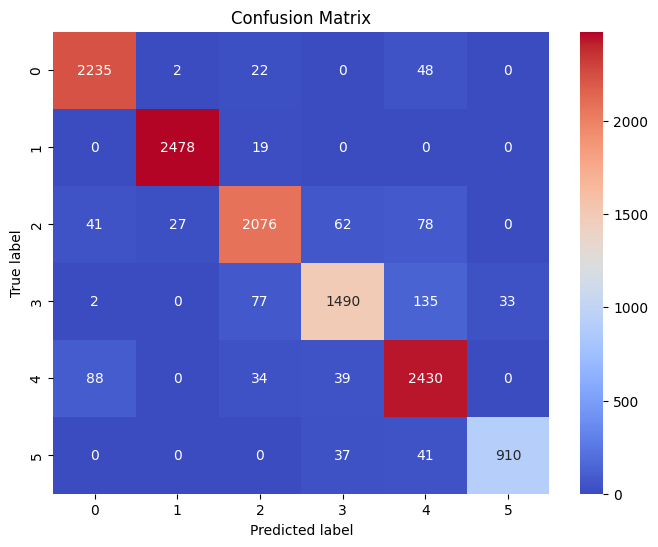

Classification Report:
              precision    recall  f1-score   support

 0000 CFU:mL       0.94      0.97      0.96      2307
 10^1 CFU:mL       0.99      0.99      0.99      2497
 10^2 CFU:mL       0.93      0.91      0.92      2284
 10^4 CFU:mL       0.92      0.86      0.89      1737
 10^6 CFU:mL       0.89      0.94      0.91      2591
 10^8 CFU:mL       0.97      0.92      0.94       988

    accuracy                           0.94     12404
   macro avg       0.94      0.93      0.93     12404
weighted avg       0.94      0.94      0.94     12404



In [24]:
# Apply SVM
from sklearn.svm import SVC

# Set the SVM model
svm = SVC()

# Fit the SVM model to the data
svm.fit(X_train, y_train)

# Predict the labels
y_pred = svm.predict(X_test)

# Print full classification report
print_full_classification_report(y_test, y_pred, target_names=le.classes_)

We apply random forest

Accuracy: 0.9999193808448887
Accuracy: 0.9999193808448887
Confusion matrix:


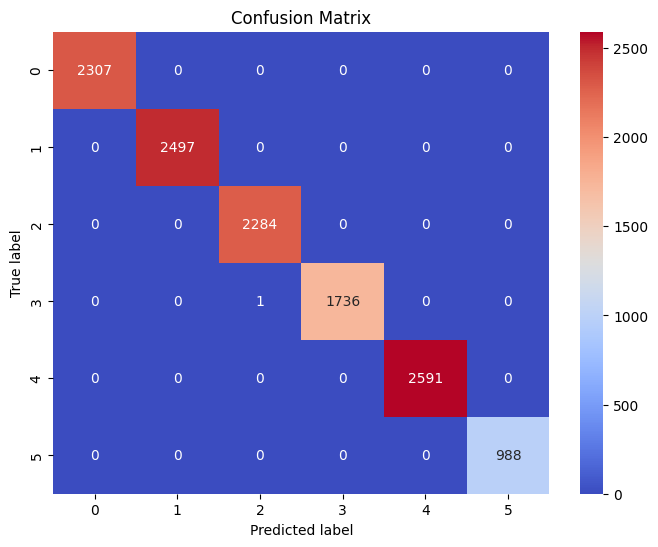

Classification Report:
              precision    recall  f1-score   support

 0000 CFU:mL       1.00      1.00      1.00      2307
 10^1 CFU:mL       1.00      1.00      1.00      2497
 10^2 CFU:mL       1.00      1.00      1.00      2284
 10^4 CFU:mL       1.00      1.00      1.00      1737
 10^6 CFU:mL       1.00      1.00      1.00      2591
 10^8 CFU:mL       1.00      1.00      1.00       988

    accuracy                           1.00     12404
   macro avg       1.00      1.00      1.00     12404
weighted avg       1.00      1.00      1.00     12404



In [25]:
# Train a classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Set the number of estimators
n_estimators = 10

# Create an instance of the classifier
clf = RandomForestClassifier(n_estimators=n_estimators)

# Train the classifier
clf.fit(X_train, y_train)

# Predict the labels
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print full classification report
print_full_classification_report(y_test, y_pred, le.classes_)

We apply XGBoost

Accuracy: 0.9960496613995485
Confusion matrix:


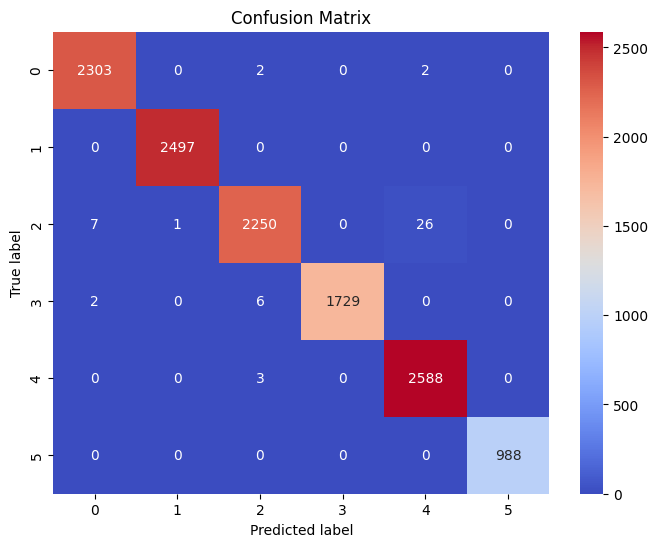

Classification Report:
              precision    recall  f1-score   support

 0000 CFU:mL       1.00      1.00      1.00      2307
 10^1 CFU:mL       1.00      1.00      1.00      2497
 10^2 CFU:mL       1.00      0.99      0.99      2284
 10^4 CFU:mL       1.00      1.00      1.00      1737
 10^6 CFU:mL       0.99      1.00      0.99      2591
 10^8 CFU:mL       1.00      1.00      1.00       988

    accuracy                           1.00     12404
   macro avg       1.00      1.00      1.00     12404
weighted avg       1.00      1.00      1.00     12404



In [26]:
# Apply XGBoost
import xgboost as xgb
from sklearn.metrics import silhouette_score

# Set the number of estimators
n_estimators = 10

# Create an instance of the classifier
clf = xgb.XGBClassifier(n_estimators=n_estimators)

# Train the classifier
clf.fit(X_train, y_train)

# Predict the labels
y_pred = clf.predict(X_test)

# Print full classification report
print_full_classification_report(y_test, y_pred, le.classes_)

We apply hierarchical clustering

In [27]:
# # Apply hierarchical clustering
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.metrics import accuracy_score, silhouette_score

# n_clusters = 6

# classifier = AgglomerativeClustering(n_clusters=n_clusters)
# classifier.fit(X_train)
# y_pred = classifier.predict(X_test)

# # Calculate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

# # Calculate the silhouette score
# silhouette = silhouette_score(X_test, y_pred)
# print(f"Silhouette score: {silhouette}")

# # Plot the data with predicted clusters
# plt.figure(figsize=(8, 6))
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')
# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
# plt.title('Agglomerative Clustering')
# plt.colorbar()
# plt.show()

We apply KNN

Accuracy: 1.0
Confusion matrix:


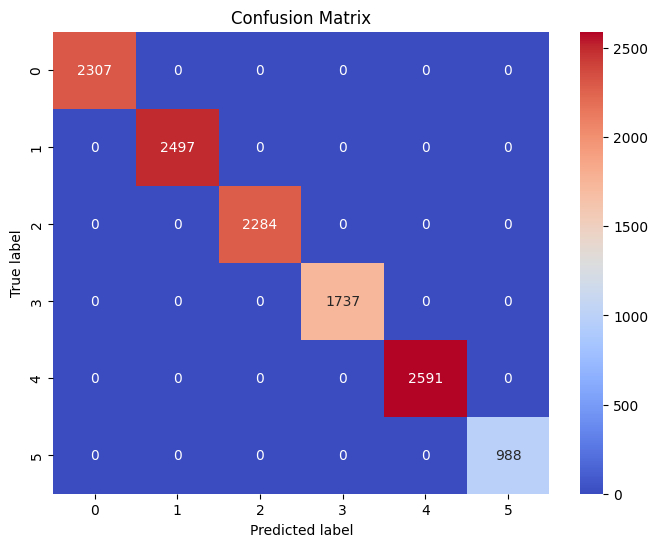

Classification Report:
              precision    recall  f1-score   support

 0000 CFU:mL       1.00      1.00      1.00      2307
 10^1 CFU:mL       1.00      1.00      1.00      2497
 10^2 CFU:mL       1.00      1.00      1.00      2284
 10^4 CFU:mL       1.00      1.00      1.00      1737
 10^6 CFU:mL       1.00      1.00      1.00      2591
 10^8 CFU:mL       1.00      1.00      1.00       988

    accuracy                           1.00     12404
   macro avg       1.00      1.00      1.00     12404
weighted avg       1.00      1.00      1.00     12404



In [28]:
# Apply KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Set the number of neighbors
n_neighbors = 7

# Create an instance of the classifier
clf = KNeighborsClassifier(n_neighbors=n_neighbors)

# Train the classifier
clf.fit(X_train, y_train)

# Predict the labels
y_pred = clf.predict(X_test)

# Print the full classification report
print_full_classification_report(y_test, y_pred, le.classes_)

We apply Deep Learning

In [44]:
%pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl (2.1 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [104]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=42, test_size=0.2)

print(f"X_train shape: {X_train.shape}")
print(f"X train example: {X_train[0]}")

print(f"X_valid shape: {X_valid.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_valid shape: {y_valid.shape}")


X_train shape: (39689, 2)
X train example: [-5.748685   0.5393444]
X_valid shape: (9923, 2)
X_test shape: (12404, 2)
y_train shape: (39689,)
y_valid shape: (9923,)


In [103]:
import tensorflow as tf

reg = tf.keras.regularizers.l2(0.0001)

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(5, activation='relu', input_shape=(X_train.shape[-1],), kernel_regularizer=reg),
        tf.keras.layers.Dense(5, activation='relu', kernel_regularizer=reg),
        tf.keras.layers.Dense(1, activation='softmax')
        # tf.keras.layers.Dense(len(CLASSES), activation='softmax')
    ]
)

model.summary()

c:\Users\Fral0\Desktop\Workbench\progetto-piccialli\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [105]:
optimizer = tf.keras.optimizers.Adam()

In [110]:
loss_function = tf.keras.losses.CategoricalCrossentropy()

In [111]:
model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy', 'mae', 'mse'])

In [112]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), verbose=1)

Epoch 1/10


c:\Users\Fral0\Desktop\Workbench\progetto-piccialli\.venv\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\Fral0\Desktop\Workbench\progetto-piccialli\.venv\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1241/1241 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2033 - loss: 0.0000e+00 - mae: 1.6000 - mse: 4.1126 - val_accuracy: 0.1964 - val_loss: 0.0000e+00 - val_mae: 1.6031 - val_mse: 4.0984
Epoch 2/10
1241/1241 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2043 - loss: 0.0000e+00 - mae: 1.5832 - mse: 4.0345 - val_accuracy: 0.1964 - val_loss: 0.0000e+00 - val_mae: 1.6031 - val_mse: 4.0984
Epoch 3/10
1241/1241 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2038 - loss: 0.0000e+00 - mae: 1.5892 - mse: 4.0622 - val_accuracy: 0.1964 - val_loss: 0.0000e+00 - val_mae: 1.6031 - val_mse: 4.0984
Epoch 4/10
1241/1241 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2076 - loss: 0.0000e+00 - mae: 1.5945 - mse: 4.1065 - val_accuracy: 0.1964 - val_loss: 0.0000e+00 - val_mae: 1.6031 - val_mse: 4.0984
Epoch 5/10
1241/1241 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2080 - loss: 0.0000e+00 - mae: 1.5806 - mse: 4.0445 - val_accuracy: 0.1964 - val_loss: 0.0000e+00 - val_mae: 1.6031 - val_mse: 4.0984
E

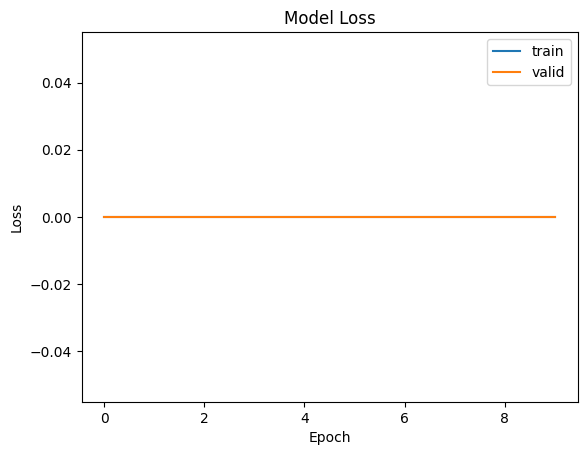

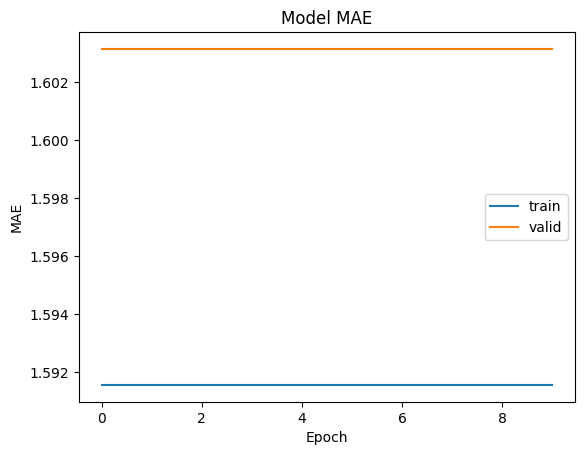

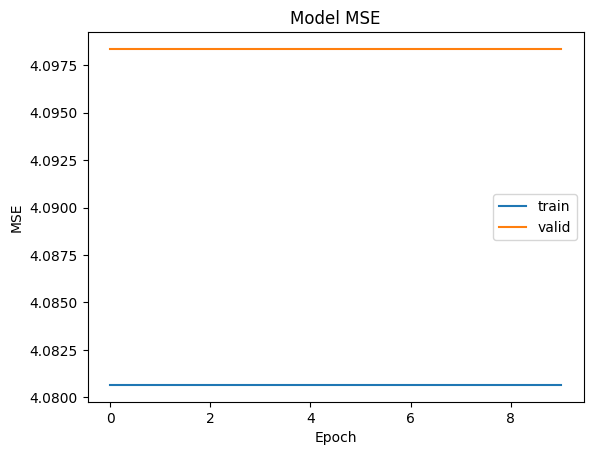

In [113]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='valid')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='valid')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [116]:
# Evaluate the model
loss, accuracy, mae, mse = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

# Predict the test data
y_pred = model.predict(X_test)

print(f"Predictions: {list(y_pred)}")

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)

388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2139 - loss: 0.0000e+00 - mae: 1.5860 - mse: 4.0965
Loss: 0.0
Accuracy: 0.2096904218196869
Mean Absolute Error: 1.5811834335327148
Mean Squared Error: 4.050225734710693
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step
Predictions: [array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=f

## Regression

Avilable algorithms:
- XGBoost
- KNN (https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm#k-NN_regression)
- Linear regression
- SVR (https://en.wikipedia.org/wiki/Support_vector_machine#Regression)
- Random Forest

In [31]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Set the dataset
X = X_umap
y = df_onehot_dropped_chi2["value_target"]

# Set the test size
test_size = 0.2

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42) # random_state set for reproducibility

# Print the shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (49612, 2)
X_test shape: (12404, 2)
y_train shape: (49612,)
y_test shape: (12404,)


We use the mean of the target value as baseline model

In [38]:
import numpy as np

# Calculate the mean of the target variable in the training set
mean_train = np.mean(y_train)

# Predict the mean for all instances in the test set
y_pred = np.full_like(y_test, mean_train)

print_full_regression_report(y_test, y_pred)

Mean absolute error: 0.1535707778169625
Mean squared error: 0.05220064767296237
Mean relative error: 0.4167235512808918


We use Linear Regression

In [37]:
# Do regression using Linear Regression
from sklearn.linear_model import LinearRegression

# Set the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the values
y_pred = model.predict(X_test)

# Print full regression report
print_full_regression_report(y_test, y_pred)

Mean absolute error: 0.11032585699325298
Mean squared error: 0.026139503204198385
Mean relative error: 0.29503290493939527


We use Random Forest Regressor

In [39]:
# Do regression using Random Forest
from sklearn.ensemble import RandomForestRegressor

# Set the model
model = RandomForestRegressor(n_estimators=50)

# Train the model
model.fit(X_train, y_train)

# Predict the values
y_pred = model.predict(X_test)

# Print full regression report
print_full_regression_report(y_test, y_pred)

Mean absolute error: 0.011609164785553048
Mean squared error: 0.0010213956498548856
Mean relative error: 0.023937477718042853


We use XGBoost

In [40]:
# Do regression using XGBoost
import xgboost as xgb

# Set the model
model = xgb.XGBRegressor(n_estimators=50)

# Train the model
model.fit(X_train, y_train)

# Predict the values
y_pred = model.predict(X_test)

# Print full regression report
print_full_regression_report(y_test, y_pred)

Mean absolute error: 0.012387612460275423
Mean squared error: 0.0009825399714467207
Mean relative error: 0.02687761838585074


We use KNN Regressor

In [41]:
# Do regression using KNN
from sklearn.neighbors import KNeighborsRegressor

# Set the model
model = KNeighborsRegressor(n_neighbors=7)

# Train the model
model.fit(X_train, y_train)

# Predict the values
y_pred = model.predict(X_test)

# Print full regression report
print_full_regression_report(y_test, y_pred)

Mean absolute error: 0.011195582070299906
Mean squared error: 0.0009457643650172099
Mean relative error: 0.022852018943234072


We use SVR (Support Vector Regressor)

In [42]:
# Do regression using SVR
from sklearn.svm import SVR

# Set the model
model = SVR()

# Train the model
model.fit(X_train, y_train)

# Predict the values
y_pred = model.predict(X_test)

# Print full regression report
print_full_regression_report(y_test, y_pred)

Mean absolute error: 0.06949129019314351
Mean squared error: 0.010347908383521875
Mean relative error: 0.18540562801325033


### Deep learning